In [1]:
### library
import pandas as pd

In [3]:
# 자료 입력
weight = [65,81,73,79,87,69,72,75,69,79,81,83,90,67,62,59,78,76,83,89,80,94,88]
group = ["A","A","A","A","A","A","B","B","B","B","B","B","B","C","C","C","C","C","C","D","D","D","D"]
df = pd.DataFrame({"weight": weight, "group":group})

In [6]:
!pip install easygui

In [10]:
import easygui

### CSV 파일에 있는 자료 읽기
df = pd.read_csv(easygui.fileopenbox())

In [12]:
df

,weight,group
0,65,A
1,81,A
2,73,A
3,79,A
4,87,A
5,69,A
6,72,B
7,75,B
8,69,B
9,79,B


In [13]:
# 변수별 자료 요약
df.describe()

,weight
count,23.000000
mean,77.347826
std,9.315718
min,59.000000
25%,70.500000
50%,79.000000
75%,83.000000
max,94.000000


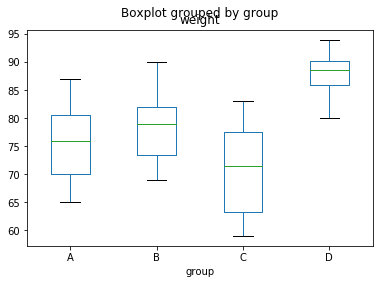

In [16]:
# 그룹별 상자그림
df.boxplot(column = 'weight',by = 'group', grid =False)

In [18]:
## 그룹별 평균
df.groupby(['group'])['weight'].mean()

group
A    75.666667
B    78.428571
C    70.833333
D    87.750000
Name: weight, dtype: float64

In [21]:
### library
from statsmodels.formula.api import ols
from statsmodels.stats import anova as aov

In [22]:
##### 일원배치 분산분석
fit = ols('weight ~ group',data=df).fit()
#분산분석표
aov.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
group,3.0,712.586439,237.528813,3.771461,0.028041
Residual,19.0,1196.630952,62.980576,NaN,NaN


- 유의수준 0.05 하에서 p-value가 유의수준보다 작으므로 영가설을 기각하고, 대립가설을 채택한다.
 네 가지 사료의 비육효과가 동일하다고 볼 수 없다.

## 사후분석(Post-hoc analysis)

- 분산분석의

- Tukey HSD

In [23]:
### library
from statsmodels.stats import multicomp as mc

In [24]:
### Tukey HSD(사후분석)
posthoc = mc.pairwise_tukeyhsd(df['weight'],df['group'],alpha = 0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   2.7619    0.9   -9.654 15.1778  False
     A      C  -4.8333 0.7014 -17.7179  8.0513  False
     A      D  12.0833   0.12  -2.3221 26.4887  False
     B      C  -7.5952 0.3414 -20.0111  4.8207  False
     B      D   9.3214  0.272  -4.6663 23.3092  False
     C      D  16.9167  0.018   2.5113 31.3221   True
-----------------------------------------------------


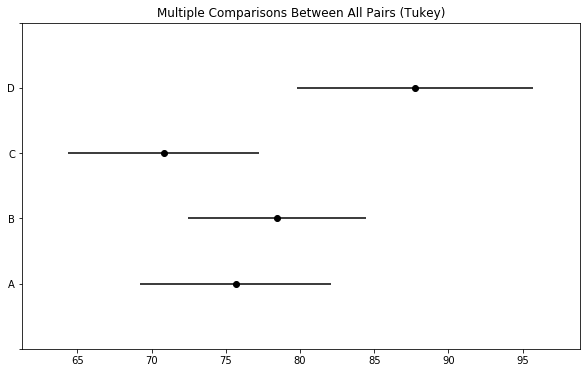

In [25]:
fig = posthoc.plot_simultaneous()

- 문제

- file : https://vincentarelbundock.github.io/Rdatasets/csv/datasets/chickwts.csv

In [27]:
### CSV 파일에 있는 자료 읽기
data_file = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/chickwts.csv"
chickwts = pd.read_csv(data_file)
chickwts = chickwts.drop(chickwts.columns[0], axis = 1)

In [28]:
chickwts

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
...,...,...
66,359,casein
67,216,casein
68,222,casein
69,283,casein


먹이종류에 따라서 무게가 차이가 나냐?

H0 : M1 =M2= M3 =M4~

H1 : not H0

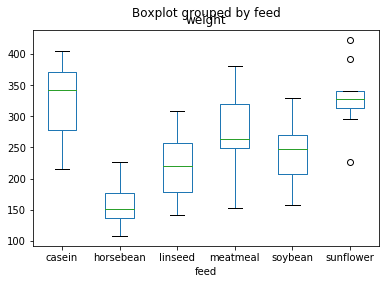

In [35]:
### boxplot by feed
chickwts.boxplot(column = 'weight',by='feed',grid=False)

In [34]:
#그룹별 평균
chickwts.groupby(['feed'])['weight'].mean()

feed
casein       323.583333
horsebean    160.200000
linseed      218.750000
meatmeal     276.909091
soybean      246.428571
sunflower    328.916667
Name: weight, dtype: float64

In [29]:
##### 일원배치 분산분석
fit = ols('weight ~ feed',data=chickwts).fit()
#분산분석표
aov.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
feed,5.0,231129.162103,46225.832421,15.3648,5.936420e-10
Residual,65.0,195556.020996,3008.554169,NaN,NaN


- p-value가 유의수준(0.05)보다 작으므로 H0를 기각하고 H1을 채택한다.

In [37]:
### Tukey HSD(사후분석)
posthoc = mc.pairwise_tukeyhsd(chickwts['weight'],chickwts['feed'],alpha = 0.05)
print(posthoc)

#reject값이 False면 H0 : m1=m2 이고 True면 H1: m1 != m2 이다.

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower    upper   reject
--------------------------------------------------------------
   casein horsebean -163.3833  0.001 -232.3445 -94.4222   True
   casein   linseed -104.8333  0.001 -170.5852 -39.0814   True
   casein  meatmeal  -46.6742 0.3324 -113.9039  20.5554  False
   casein   soybean  -77.1548 0.0084 -140.5149 -13.7947   True
   casein sunflower    5.3333    0.9  -60.4186  71.0852  False
horsebean   linseed     58.55 0.1412  -10.4112 127.5112  False
horsebean  meatmeal  116.7091  0.001   46.3375 187.0806   True
horsebean   soybean   86.2286 0.0042    19.544 152.9132   True
horsebean sunflower  168.7167  0.001   99.7555 237.6778   True
  linseed  meatmeal   58.1591 0.1274   -9.0705 125.3887  False
  linseed   soybean   27.6786 0.7679  -35.6815  91.0387  False
  linseed sunflower  110.1667  0.001   44.4148 175.9186   True
 meatmeal   soybean  -30.4805 0.7133  -95.3729  34.4118

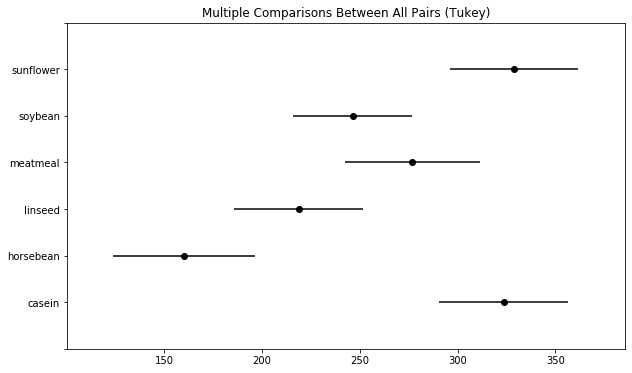

In [38]:
# 그래프로 사후분석 확인
fig = posthoc.plot_simultaneous() 